# Stratified splitting (classification problem)

## Stratified splitting with respect to response
**Q: When splitting data into train and test for developing and assessing a classification model, it is recommended to stratify the split with respect to the response. Why?**

**A:** The main advantage of stratified splitting is that it can help ensure that the training and testing sets have similar distributions of the target variable, which can lead to more accurate and reliable model performance estimates.

In many real-world datasets, the target variable may be imbalanced, meaning that one class is more prevalent than the other(s). For example, in a medical dataset, the majority of patients may not have a particular disease, while only a small fraction may have the disease. If a random split is used to divide the dataset into training and testing sets, there is a risk that the testing set may not have enough samples from the minority class, which can lead to biased model performance estimates.

Stratified splitting addresses this issue by ensuring that both the training and testing sets have similar proportions of the target variable. This can lead to more accurate model performance estimates, especially for imbalanced datasets, by ensuring that the testing set contains enough samples from each class to make reliable predictions.

Another advantage of stratified splitting is that it can help ensure that the model is not overfitting to a particular class. If a random split is used and one class is overrepresented in the training set, the model may learn to predict that class well but perform poorly on the other class(es). Stratified splitting can help ensure that the model is exposed to a representative sample of all classes during training, which can improve its generalization performance on new, unseen data.

In summary, the advantages of stratified splitting are that it can lead to more accurate and reliable model performance estimates, especially for imbalanced datasets, and can help prevent overfitting to a particular class.

## Stratified splitting with respect to response and categorical predictors

**Q: Will it be better to stratify the split with respect to the response as well as categorical predictors, instead of only the response? In that case, the train and test datasets will be even more representative of the complete data.**

**A:** It is not recommended to stratify with respect to both the response and categorical predictors simultaneously, while splitting a dataset into train and test, because doing so may result in the test data being very similar to train data, thereby defeating the purpose of assessing the model on unseen data. This kind of a stratified splitting will tend to make the relationships between the response and predictors in train data also appear in test data, which will result in the performance on test data being very similar to that in train data. Thus, in this case, the ability of the model to generalize to new, unseen data won't be assessed by test data. 

Therefore, it is generally recommended to only stratify the response variable when splitting the data for model training, and to use random sampling for the predictor variables. This helps to ensure that the model is able to capture the underlying relationships between the predictor variables and the response variable, while still being able to generalize well to new, unseen data.

In the extreme scenario, when there are no continuous predictors, and there are enough observations for stratification with respect to the response and the categorical predictors, the train and test datasets may turn out to be exactly the same. Example 1 below illustrates this scenario.

## Example 1
The example below shows that the train and test data can be exactly the same if we stratify the split with respect to response and the categorical predictors.

In [166]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from itertools import product
sns.set(font_scale=1.35)

Let us simulate a dataset with 8 observations, two categorical predictors `x1` and `x2` and the the binary response `y`.

In [167]:
#Setting a seed for reproducible results
np.random.seed(9)

# 8 observations
n = 8

#Simulating the categorical predictors
x1 = pd.Series(np.random.randint(0,2,n), name = 'x1')
x2 = pd.Series(np.random.randint(0,2,n), name = 'x2')

#Simulating the response
pr = (x1==1)*0.7+(x2==0)*0.3# + (x3*0.1>0.1)*0.1
y = pd.Series(1*(np.random.uniform(size = n) < pr), name = 'y')

#Defining the predictor object 'X'
X = pd.concat([x1, x2], axis = 1)

#Stratified splitting with respect to the response and predictors to create 50% train and test datasets
X_train_stratified, X_test_stratified, y_train_stratified,\
y_test_stratified = train_test_split(X, y, test_size = 0.5, random_state = 45, stratify=data[['x1', 'x2', 'y']])

#Train and test data resulting from the above stratified splitting
data_train = pd.concat([X_train_stratified, y_train_stratified], axis = 1)
data_test = pd.concat([X_test_stratified, y_test_stratified], axis = 1)

Let us check the train and test datasets created with stratified splitting with respect to both the predictors and the response.

In [168]:
data_train

,x1,x2,y
2,0,0,1
7,0,1,0
3,1,0,1
1,0,1,0


In [169]:
data_test

,x1,x2,y
4,0,1,0
6,1,0,1
0,0,1,0
5,0,0,1


Note that the train and test datasets are exactly the same! Stratified splitting tends to have the same proportion of observations corresponding to each strata in both the train and test datasets, where each strata is a unique combination of values of `x1`, `x2`, and `y`. This will tend to make the train and test datasets quite similar!

## Example 2: Simulation results

The example below shows that train and test set performance will tend to be quite similar if we stratify the datasets with respect to the predictors and the response.

We'll simulate a dataset consisting of 1000 observations, 2 categorical predictors `x1` and `x2`, a continuous predictor `x3`, and a binary response `y`.

In [204]:
#Setting a seed for reproducible results
np.random.seed(99)

# 1000 Observations
n = 1000

#Simulating categorical predictors x1 and x2
x1 = pd.Series(np.random.randint(0,2,n), name = 'x1')
x2 = pd.Series(np.random.randint(0,2,n), name = 'x2')

#Simulating continuous predictor x3
x3 = pd.Series(np.random.normal(0,1,n), name = 'x3')

#Simulating the response
pr = (x1==1)*0.7+(x2==0)*0.3 + (x3*0.1>0.1)*0.1
y = pd.Series(1*(np.random.uniform(size = n) < pr), name = 'y')

#Defining the predictor object 'X'
X = pd.concat([x1, x2, x3], axis = 1)

We'll comparing model performance metrics when the data is split into train and test by performing stratified splitting

1. Only with respect to the response

2. With respect to the response and categorical predictors

We'll perform 1000 simulations, where the data is split using a different seed in each simulation.

In [205]:
#Creating an empty dataframe to store simulation results of 1000 simulations
accuracy_iter = pd.DataFrame(columns = {'train_y_stratified','test_y_stratified',
                                        'train_y_CatPredictors_stratified','test_y_CatPredictors_stratified'})

In [206]:
# Comparing model performance metrics when the data is split into train and test by performing stratified splitting
# (1) only with respect to the response
# (2) with respect to the response and categorical predictors

# Stratified splitting is performed 1000 times and the results are compared
for i in np.arange(1,1000):
 
    #--------Case 1-------------------#
    # Stratified splitting with respect to response only to create train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i, stratify=y)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Model accuracy on train and test data, with stratification only on response while splitting 
    # the complete data into train and test
    accuracy_iter.loc[(i-1), 'train_y_stratified'] = model.score(X_train, y_train)
    accuracy_iter.loc[(i-1), 'test_y_stratified'] = model.score(X_test, y_test)
        
    #--------Case 2-------------------#
    # Stratified splitting with respect to response and categorical predictors to create train 
    # and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i, 
                                                        stratify=pd.concat([x1, x2, y], axis = 1))
    model.fit(X_train, y_train)

    # Model accuracy on train and test data, with stratification on response and predictors while 
    # splitting the complete data into train and test
    accuracy_iter.loc[(i-1), 'train_y_CatPredictors_stratified'] = model.score(X_train, y_train)
    accuracy_iter.loc[(i-1), 'test_y_CatPredictors_stratified'] = model.score(X_test, y_test)
    
# Converting accuracy to numeric
accuracy_iter = accuracy_iter.apply(lambda x:x.astype(float), axis = 1)

### Distribution of train and test accuracies {-}

The table below shows the distribution of train and test accuracies when the data is split into train and test by performing stratified splitting:

1. Only with respect to the response (see `train_y_stratified` and `test_y_stratified`)

2. With respect to the response and categorical predictors (see `train_y_CatPredictors_stratified` and `test_y_CatPredictors_stratified`)

In [200]:
accuracy_iter.describe()

,train_y_stratified,test_y_stratified,train_y_CatPredictors_stratified,test_y_CatPredictors_stratified
count,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,0.834962,0.835150,8.350000e-01,8.350000e-01
std,0.005833,0.023333,8.552999e-15,8.552999e-15
min,0.812500,0.755000,8.350000e-01,8.350000e-01
25%,0.831250,0.820000,8.350000e-01,8.350000e-01
50%,0.835000,0.835000,8.350000e-01,8.350000e-01
75%,0.838750,0.850000,8.350000e-01,8.350000e-01
max,0.855000,0.925000,8.350000e-01,8.350000e-01


Let us visualize the distribution of these accuracies.

### Stratified splitting only with respect to the response

Text(0.5, 0, 'Accuracy')

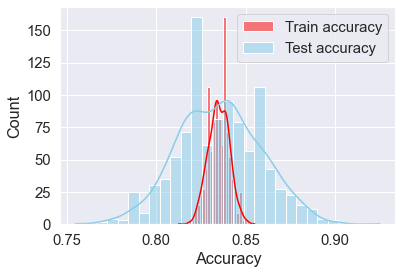

In [198]:
sns.histplot(data=accuracy_iter, x="train_y_stratified", color="red", label="Train accuracy", kde=True)
sns.histplot(data=accuracy_iter, x="test_y_stratified", color="skyblue", label="Test accuracy", kde=True);
plt.legend()
plt.xlabel('Accuracy')

Note the variability in train and test accuracies when the data is stratified only with respect to the response. The train accuracy varies between 81.2% and 85.5%, while the test accuracy varies between 75.5% and 92.5%.

### Stratified splitting with respect to the response and categorical predictors

Text(0.5, 0, 'Accuracy')

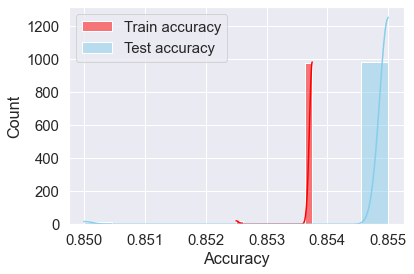

In [207]:
sns.histplot(data=accuracy_iter, x="train_y_CatPredictors_stratified", color="red", label="Train accuracy", kde=True)
sns.histplot(data=accuracy_iter, x="test_y_CatPredictors_stratified", color="skyblue", label="Test accuracy", kde=True);
plt.legend()
plt.xlabel('Accuracy')

The train and test accuracies are between 85% and 85.5% for all the simulations. As a results of stratifying the splitting with respect to both the response and the categorical predictors, the train and test datasets are almost the same because the datasets are engineered to be quite similar, thereby making the test dataset inappropriate for assessing accuracy on unseen data. Thus, it is recommended to stratify the splitting only with respect to the response.